In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

# Convert 'Date' to datetime if not already done
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

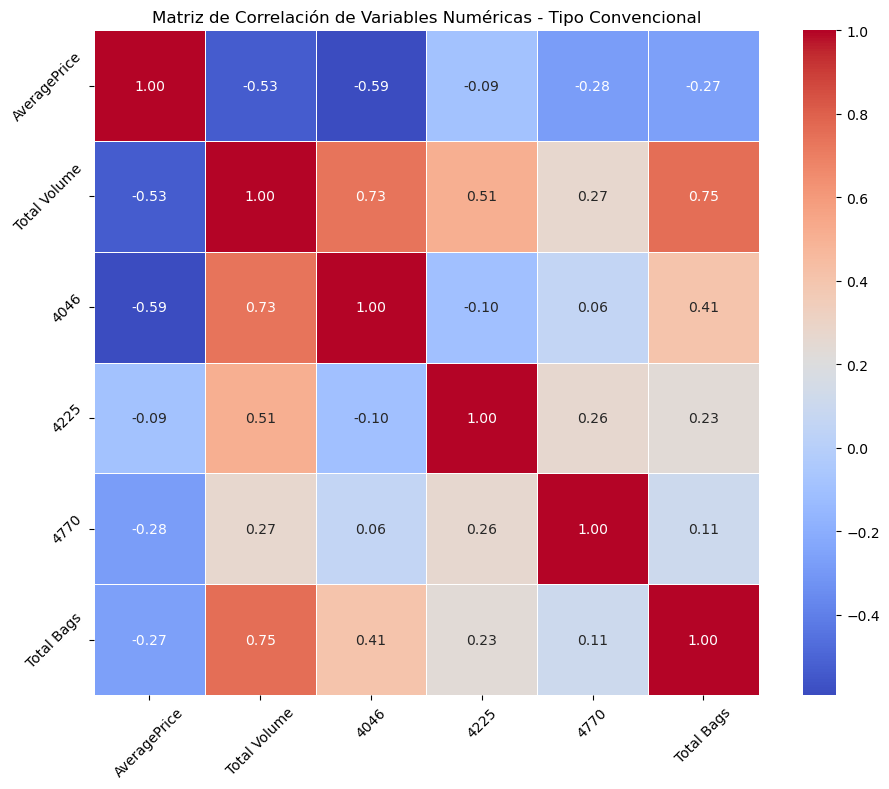

In [9]:
# Filter data for conventional type only
df_conventional = df_filtered[df_filtered['type'] == 'conventional']

# Calculate the correlation matrix for the conventional type data
correlation_matrix = df_conventional[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].corr()

# Configure the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Customize the plot
plt.title('Matriz de Correlación de Variables Numéricas - Tipo Convencional')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


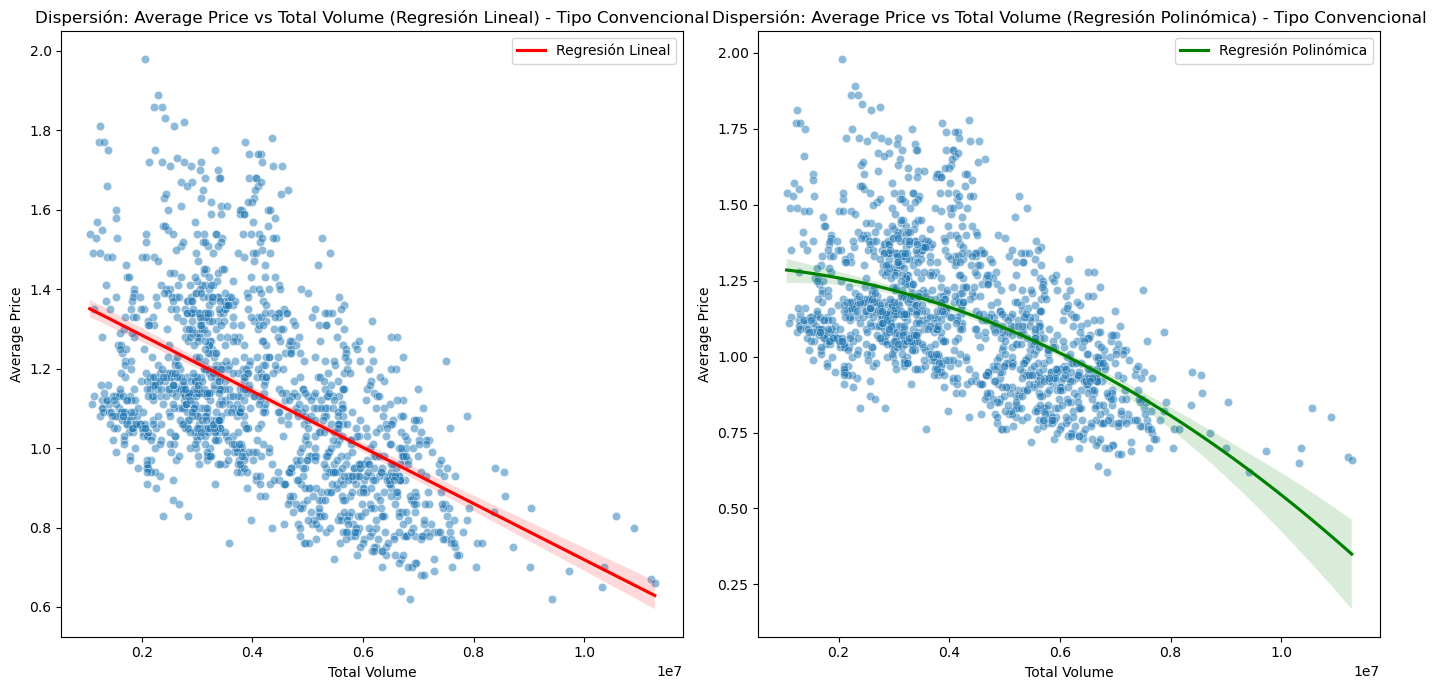

In [10]:
# Filter data for conventional type only
df_conventional = df_filtered[df_filtered['type'] == 'conventional']

# Create a scatter plot between AveragePrice and Total Volume
plt.figure(figsize=(14, 7))

# Scatter plot with linear regression
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_conventional, x='Total Volume', y='AveragePrice', alpha=0.5)
sns.regplot(data=df_conventional, x='Total Volume', y='AveragePrice', scatter=False, color='red', label='Regresión Lineal')
plt.title('Dispersión: Average Price vs Total Volume (Regresión Lineal) - Tipo Convencional')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.legend()

# Scatter plot with polynomial regression
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_conventional, x='Total Volume', y='AveragePrice', alpha=0.5)
sns.regplot(data=df_conventional, x='Total Volume', y='AveragePrice', scatter=False, order=2, color='green', label='Regresión Polinómica')
plt.title('Dispersión: Average Price vs Total Volume (Regresión Polinómica) - Tipo Convencional')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Filter data for conventional type only
df_conventional = df_filtered[df_filtered['type'] == 'conventional']

# Define features and target variable
X = df_conventional[['Total Volume']].values
y = df_conventional['AveragePrice'].values

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Calculate R2 and error for Linear Regression
r2_linear = r2_score(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Calculate R2 and error for Polynomial Regression
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Print results
print(f"Linear Regression R2: {r2_linear:.4f}")
print(f"Linear Regression RMSE: {rmse_linear:.4f}")
print(f"Polynomial Regression R2: {r2_poly:.4f}")
print(f"Polynomial Regression RMSE: {rmse_poly:.4f}")



Linear Regression R2: 0.2828
Linear Regression RMSE: 0.1977
Polynomial Regression R2: 0.2960
Polynomial Regression RMSE: 0.1959
